In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('D3.csv')
M=len(df)
M

100

In [3]:
in1 = df.values[:, 0] 
in2 = df.values[:, 1]
in3 = df.values[:, 2]
y = df.values[:, 3]  
m = len(y)
print('in1 = ', in1[: 100])
print('in2 = ', in2[: 100])
print('in3 = ', in3[: 100])
print('y = ', y[: 100])
print('m = ', m)

in1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3

Text(0.5, 1.0, 'Scatter plot of training data')

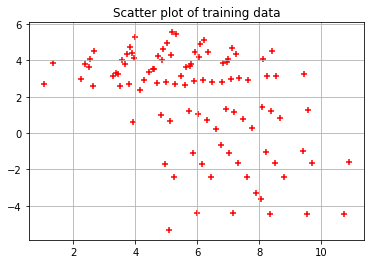

In [4]:
inp = in1 + in2 + in3
plt.scatter(inp,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Scatter plot of training data')

In [5]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
X_1 = inp.reshape(m, 1)
print("X_1 = ",X_1[:10])

X_1 =  [[3.88      ]
 [1.06383838]
 [2.24767677]
 [3.43151515]
 [4.61535354]
 [5.79919192]
 [6.9830303 ]
 [4.16686869]
 [1.35070707]
 [2.53454545]]


In [7]:
X = np.hstack(( X_0, X_1))
X[:5]

array([[1.        , 3.88      ],
       [1.        , 1.06383838],
       [1.        , 2.24767677],
       [1.        , 3.43151515],
       [1.        , 4.61535354]])

In [8]:
theta = [0., 1.]
theta

[0.0, 1.0]

In [9]:
def compute_cost(X, y, theta):

  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [10]:
cost = compute_cost(X, y, theta)
print('Cost =', cost)

Cost = 17.08807483389534


In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
    
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [12]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [13]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 4.48162264 -0.46187276]
cost_history = [4.94462944 4.73823826 4.6633074  ... 3.01978055 3.01962675 3.01947328]


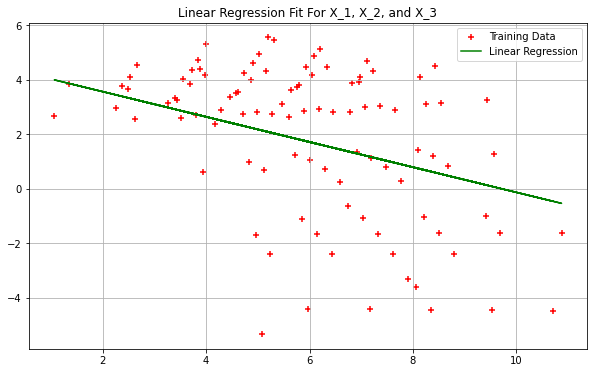

In [14]:
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.title('Linear Regression Fit For X_1, X_2, and X_3')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent For X_1, X_2, and X_3')

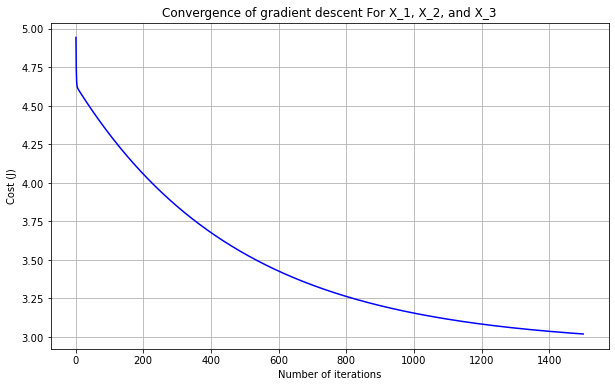

In [15]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent For X_1, X_2, and X_3')